# Ali Abdullah Ahmad
# CWID- 20031246
## Section 3.3 part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import mutual_info_classif
import joblib

In [2]:
df = pd.read_csv('C:/Users/abdul/OneDrive/Documents/GitHub/CS559_project/cluster_5.csv')
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Cluster,Bankrupt?,Index
0,0.510359,0.537287,0.552546,0.600023,0.600023,0.999009,0.797406,0.809313,0.303468,0.781614,...,0.600019,0.840313,0.279878,0.026880,0.565549,1,0.028858,5,0,4
1,0.514113,0.566779,0.565341,0.613312,0.613312,0.999154,0.797618,0.809497,0.303536,0.781770,...,0.613313,0.841336,0.277518,0.026847,0.565411,1,0.044359,5,0,8
2,0.474918,0.533689,0.529739,0.601976,0.601976,0.998962,0.797381,0.809315,0.303524,0.781567,...,0.601978,0.840101,0.277650,0.037217,0.569733,1,0.042841,5,0,10
3,0.480866,0.546991,0.529953,0.595994,0.594863,0.998926,0.797466,0.809373,0.303749,0.781622,...,0.595993,0.840578,0.276414,0.026797,0.565186,1,0.066087,5,0,16
4,0.513869,0.561110,0.554312,0.609291,0.609291,0.999085,0.797501,0.809389,0.303477,0.781640,...,0.609291,0.841062,0.276569,0.026792,0.565165,1,0.061499,5,0,29


In [3]:
df.shape

(1031, 98)

In [4]:
index = df['Index']
target = df['Bankrupt?']
cluster = df['Cluster']
X = df.drop(columns=['Index','Bankrupt?','Cluster'])

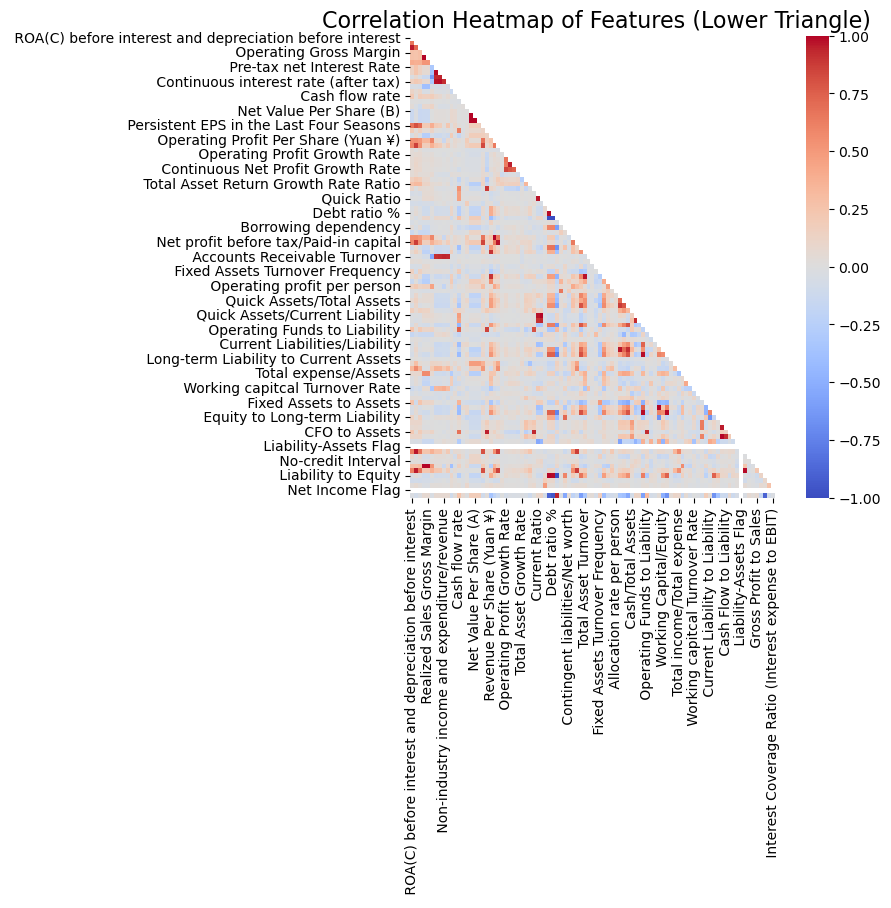

In [5]:
# Compute the correlation matrix
corr = X.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features (Lower Triangle)", fontsize=16)
plt.show()

In [6]:
high_corr_f = set()

for j in range(len(corr.columns)):
    for i in range(j):
        if abs(corr.iloc[j,i])>0.95:
            colname = corr.columns[j]
            high_corr_f.add(colname)

df_reduced = X.drop(columns=high_corr_f)

df_reduced.shape

(1031, 72)

C:\Users\abdul\AppData\Local\Temp\ipykernel_26864\1713963749.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mi Score", y="Feature", data=mi_df, palette="viridis")  # Create a horizontal bar plot


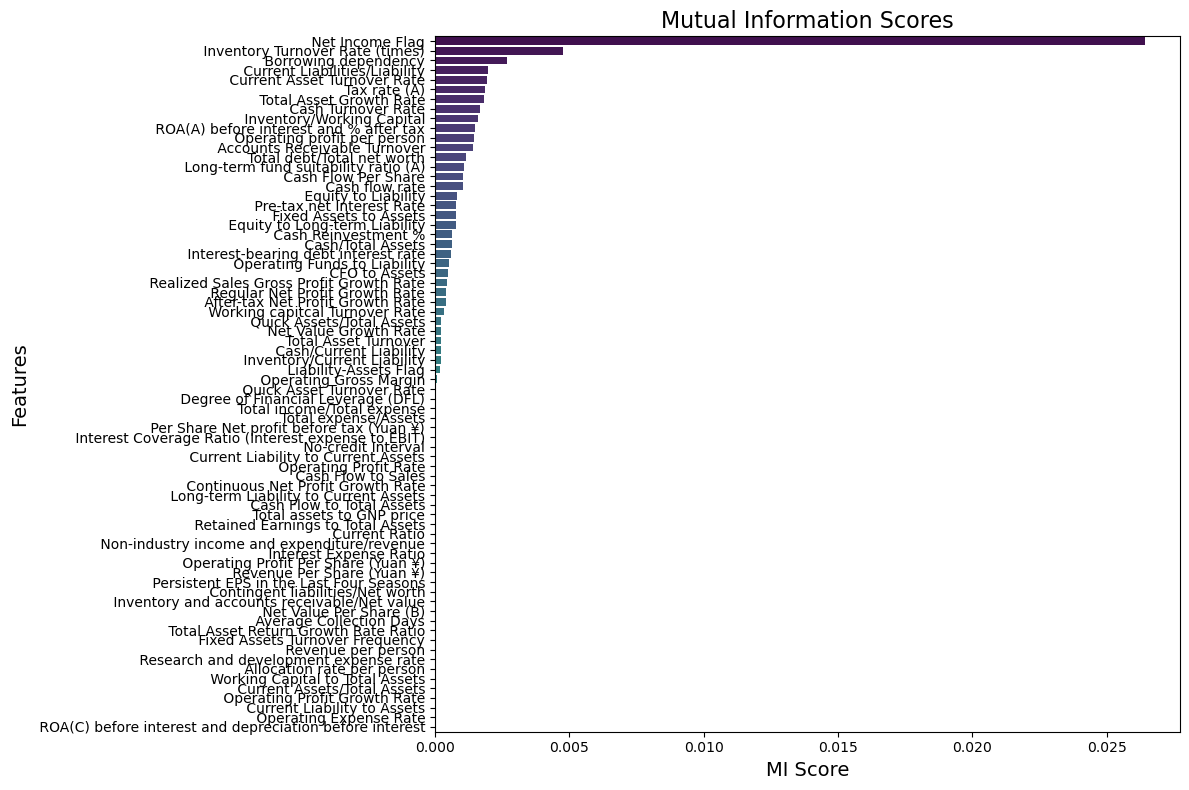

In [7]:
mi_score = mutual_info_classif(df_reduced , target, random_state=42)

mi_df = pd.DataFrame({
    "Feature":df_reduced.columns,
    "Mi Score": mi_score
}).sort_values(by="Mi Score",ascending=False)

# Improved plotting of mutual information scores
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x="Mi Score", y="Feature", data=mi_df, palette="viridis")  # Create a horizontal bar plot
plt.title("Mutual Information Scores", fontsize=16)  # Set the plot title
plt.xlabel("MI Score", fontsize=14)  # Label for the x-axis
plt.ylabel("Features", fontsize=14)  # Label for the y-axis
plt.tight_layout()  # Adjust layout for better fit
plt.show()  # Display the plot

In [8]:
# Display the full mutual information scores DataFrame
pd.set_option('display.max_rows', None)  # Set to display all rows
print(mi_df.sort_values(by="Mi Score", ascending=False))

# Drop rows where "Mi Score" is less than 0.01
mi_01 = mi_df[mi_df["Mi Score"] >= 0.001]

                                              Feature      Mi Score
70                                    Net Income Flag  2.640242e-02
36                    Inventory Turnover Rate (times)  4.747468e-03
30                               Borrowing dependency  2.681064e-03
50                      Current Liabilities/Liability  1.987291e-03
55                        Current Asset Turnover Rate  1.956843e-03
10                                       Tax rate (A)  1.846994e-03
22                            Total Asset Growth Rate  1.843855e-03
58                                 Cash Turnover Rate  1.696337e-03
48                          Inventory/Working Capital  1.620667e-03
1              ROA(A) before interest and % after tax  1.508260e-03
39                        Operating profit per person  1.470446e-03
34                       Accounts Receivable Turnover  1.414126e-03
28                         Total debt/Total net worth  1.158504e-03
29               Long-term fund suitability rati

In [9]:
df_01 = df_reduced.drop(columns=[col for col in df_reduced.columns if col not in mi_01["Feature"].values])
df_01.shape

(1031, 16)

In [10]:
columns = df_01.columns

print(columns)

Index([' ROA(A) before interest and % after tax', ' Cash flow rate',
       ' Tax rate (A)', ' Cash Flow Per Share', ' Total Asset Growth Rate',
       ' Total debt/Total net worth', ' Long-term fund suitability ratio (A)',
       ' Borrowing dependency', ' Accounts Receivable Turnover',
       ' Inventory Turnover Rate (times)', ' Operating profit per person',
       ' Inventory/Working Capital', ' Current Liabilities/Liability',
       ' Current Asset Turnover Rate', ' Cash Turnover Rate',
       ' Net Income Flag'],
      dtype='object')


In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np


class FeatureSelector5(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        """
        Initialize the feature selector with the column names to be selected.
        
        :param columns: List of column names to select from the DataFrame.
        """
        self.columns = columns
        self.scaler = StandardScaler()  # Create a scaler object
    
    def fit(self, X, y=None):
        """
        Fit the scaler on the selected columns.
        """
        # Select only the columns specified by the user
        X_selected = X[self.columns]
        # Fit the scaler only on the selected columns
        self.scaler.fit(X_selected)
        return self
    
    def transform(self, X):
        """
        Select the specified columns and scale them.
        
        :param X: Input DataFrame.
        :return: Scaled DataFrame with selected columns.
        """
        # Select only the columns specified by the user
        X_selected = X[self.columns]
        # Scale the selected columns
        X_scaled = self.scaler.transform(X_selected)
        
        # Create a DataFrame with the scaled columns and original column names
        X_scaled_df = pd.DataFrame(X_scaled, columns=self.columns, index=X.index)
        return X_scaled_df

In [12]:
base_models = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),  
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=42))
]
for name, model in base_models:
    model.fit(df_01, target)
    score = model.score(df_01, target)
    print(f'{name} accuracy: {round(score, 3)}')

# Meta model
meta_model = LogisticRegression(class_weight='balanced', random_state=42)

# Define stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3)
result = stacked_model.fit(df_01,target).score(df_01,target)
print(f'cv: {round(result,3)}') 

y_pred = stacked_model.predict(df_01)
cm = confusion_matrix(target, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(target, y_pred))

# Calculate acc = TT / (TT + TF) and display TT(TF)
for name, model in base_models:
    y_pred_base = model.predict(df_01)
    cm_base = confusion_matrix(target, y_pred_base)
    TT_base = cm_base[1, 1]
    TF_base = cm_base[1, 0]
    acc_base = TT_base / (TT_base + TF_base) if (TT_base + TF_base) > 0 else 0
    print(f"\n{name} - TT: {TT_base}, TF: {TF_base}, Accuracy (acc) for bankrupt companies: {acc_base:.4f}")

# For meta model
y_pred_meta = stacked_model.predict(df_01)
cm_meta = confusion_matrix(target, y_pred_meta)
TT_meta = cm_meta[1, 1]
TF_meta = cm_meta[1, 0]
acc_meta = TT_meta / (TT_meta + TF_meta) if (TT_meta + TF_meta) > 0 else 0
print(f"\nMeta model - TT: {TT_meta}, TF: {TF_meta}, Accuracy (acc) for bankrupt companies: {acc_meta:.4f}")

rf accuracy: 1.0
gb accuracy: 1.0
dt accuracy: 1.0
cv: 1.0
Confusion Matrix:
 [[1027    0]
 [   0    4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       1.00      1.00      1.00         4

    accuracy                           1.00      1031
   macro avg       1.00      1.00      1.00      1031
weighted avg       1.00      1.00      1.00      1031


rf - TT: 4, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000

gb - TT: 4, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000

dt - TT: 4, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000

Meta model - TT: 4, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000


In [13]:
import joblib
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('feature_select', FeatureSelector5(columns)),  # Feature selection step
    ('model', stacked_model)  # Stacking model
])

y = df['Bankrupt?']
X = df.drop(columns=['Bankrupt?','Index'])

pipeline.fit(X, y)

joblib.dump(pipeline, 'subgroup_5_model.pkl')

['subgroup_5_model.pkl']